# Digit Recognition

Using the digits dataset from sklearn, different classifier models are tested.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree, svm, linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

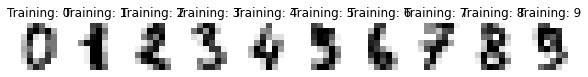

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' %label)

In [8]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, random_state=0)


# test
def test_classifier(predicted, clf):
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(10,3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8,8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Prediction: {prediction}')

    print(f"Classifier score: {clf.score(X_test, y_test)}")

    print(f"Classification report for classifier {clf}:\n"
          f"{metrics.classification_report(y_test, predicted)}\n")
    
# cross validation
def cross_validate(X, y, clf, cv):
    scores = cross_val_score(clf, X, y, cv=cv)
    print(f"Cross validation score, using {cv} ")
    for i, score in enumerate(scores):
        print(f"Test {i}: {score}")
    print(f"Mean score: {np.mean(scores)}, std: {np.std(scores)}")

### K Nearest Neighbours

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# find optimal K
k_values = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(knn, k_values)
clf.fit(X_train, y_train)
best_k = clf.best_params_['n_neighbors']
print(f"Optimal K: {best_k}")

Optimal K: 3


Classifier score: 0.9866666666666667
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.98      0.99        43
           2       0.98      1.00      0.99        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        48
           8       1.00      0.96      0.98        48
           9       0.98      1.00      0.99        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450


Test 0: 0.9388888888888889
Test 1: 1.0
Test 2: 0.9888888888888889
Test 3: 0.9722222222222222
Test 4: 0.9666666666666667
Test 5: 0

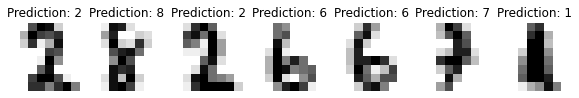

In [10]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

predicted = knn.predict(X_test)

test_classifier(predicted, knn)
cross_validate(X, y, knn, 10)

### Decision Tree

Classifier score: 0.9711111111111111
Classification report for classifier SVC(gamma=0.005):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       1.00      0.95      0.98        43
           2       1.00      0.95      0.98        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       1.00      0.98      0.99        48
           6       1.00      0.96      0.98        52
           7       1.00      0.96      0.98        48
           8       0.80      1.00      0.89        48
           9       0.98      0.98      0.98        47

    accuracy                           0.97       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.97      0.97       450




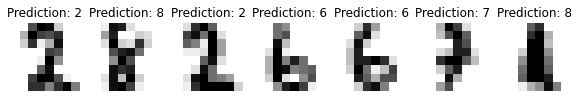

In [62]:
# create decision tree classifier
dec_tree = tree.DecisionTreeClassifier()
dec_tree = clf.fit(X_train, y_train)

predicted = dec_tree.predict(X_test)

test_classifier(predicted, dec_tree)

### Support Vector Machine

Classifier score: 0.9711111111111111
Classification report for classifier SVC(gamma=0.005):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       1.00      0.95      0.98        43
           2       1.00      0.95      0.98        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       1.00      0.98      0.99        48
           6       1.00      0.96      0.98        52
           7       1.00      0.96      0.98        48
           8       0.80      1.00      0.89        48
           9       0.98      0.98      0.98        47

    accuracy                           0.97       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.97      0.97       450




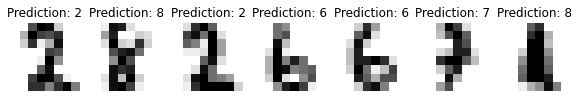

In [63]:
# create support vector machine classifier
svm = svm.SVC(gamma=0.005)
svm.fit(X_train, y_train)

predicted = svm.predict(X_test)

test_classifier(predicted, svm)

In [64]:
print(svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.005, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
